In [ ]:
import os
os.chdir('/data/kkovacs/Python')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import scanpy as sc
import copy
import torch
import scarches as sca
from scarches.dataset.trvae.data_handling import remove_sparsity
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import gdown
import sankey
import anndata
import pandas as pd
import pandas as pd
from pySankey.sankey import sankey
from matplotlib.pyplot import rc_context
import seaborn as sns
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(5, 5))
torch.set_printoptions(precision=10, sci_mode=False, edgeitems=12)
pd.options.mode.chained_assignment = None

In [7]:
import scipy.sparse as sp

In [5]:
directory = '.../MouseAtlas/'

In [6]:
covid = sc.read(directory + "/Data/FinalObject_Genotype_final.h5ad")
copd_covid = sc.read(directory + "/Data/copd_covid_final.h5ad")
copd = sc.read(directory + "/Data/final_copd.h5ad")
age = sc.read(directory + "/Data/Ageing_final.h5ad")
cssc = sc.read(directory + "/Data/mouse_CSSC.h5ad")
murid = sc.read(directory + "/Data/mouse_Herpesvirus.h5ad")
hyper = sc.read(directory + "/Data/Mouse_Hyperoxia_final.h5ad")
tb = sc.read(directory + "/Data/Mouse_TB_final.h5ad")#c
cancer = sc.read(directory + "/Data/Mouse_Cancer_final.h5ad")
hypo = sc.read(directory + "/Data/Mouse_Hypoxia_final.h5ad")
rad = sc.read(directory + "/Data/Mouse_Radiation_final.h5ad")
sendai = sc.read(directory + "/Data/Mouse_Post_Sendai_final.h5ad")
tumor = sc.read(directory + "/Data/Mouse_TumorKO_final.h5ad")
fibro = sc.read(directory + "/Data/Mouse_fibrosis_final.h5ad")
asthma = sc.read(directory + "/Data/Mouse_asthma_final.h5ad")
fibage = sc.read(directory + "/Data/Mouse_fibro_age_final.h5ad")
influ = sc.read(directory + "/Data/Mouse_influenza_final.h5ad")

print(covid)

AnnData object with n_obs × n_vars = 37306 × 40051
    obs: 'nCount_covid', 'nFeature_covid', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'CellStatus', 'pANN_0.25_0.09_241', 'DF.classifications_0.25_0.09_241', 'DoubletStatus', 'pANN_0.25_0.09_520', 'DF.classifications_0.25_0.09_520', 'pANN_0.25_0.09_148', 'DF.classifications_0.25_0.09_148', 'pANN_0.25_0.09_368', 'DF.classifications_0.25_0.09_368', 'pANN_0.25_0.09_1110', 'DF.classifications_0.25_0.09_1110', 'pANN_0.25_0.09_33', 'DF.classifications_0.25_0.09_33', 'pANN_0.25_0.09_1015', 'DF.classifications_0.25_0.09_1015', 'nGene', 'nUMI', 'Group', 'res.0', 'res.0.1', 'res.0.2', 'res.0.3', 'res.0.4', 'res.0.5', 'res.0.6', 'res.0.7', 'res.0.8', 'res.0.9', 'res.1', 'seurat_clusters', 'infection', 'Sample.Gender', 'percent.hb', 'percent.rp', 'cluster_labels_res.0.4', 'predicted.classification_Angelidis.score', 'predicted.classification_Angelidis', 'mouseRNA.labels', 'immgen.labels', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_sn

In [ ]:
Noticed that the only change in gene names across studies was that there was some punctuation differences for some genes.

That some studies have '.' and others use '-'.

In [ ]:
studies = [covid,...]
studies.var_names = studies.var_names.str.replace('.','-')

In [8]:
adata = sc.read("/data/kkovacs/Python/Data/Combined_no_pro.h5ad")

In [ ]:
adata = covid.concatenate(copd_covid,copd,age,cssc,murid,hyper,\
	tb,cancer,hypo,rad,il33,tumor,fibro,asthma,fibage,influ,\
	index_unique=None,join='outer',fill_value=0)

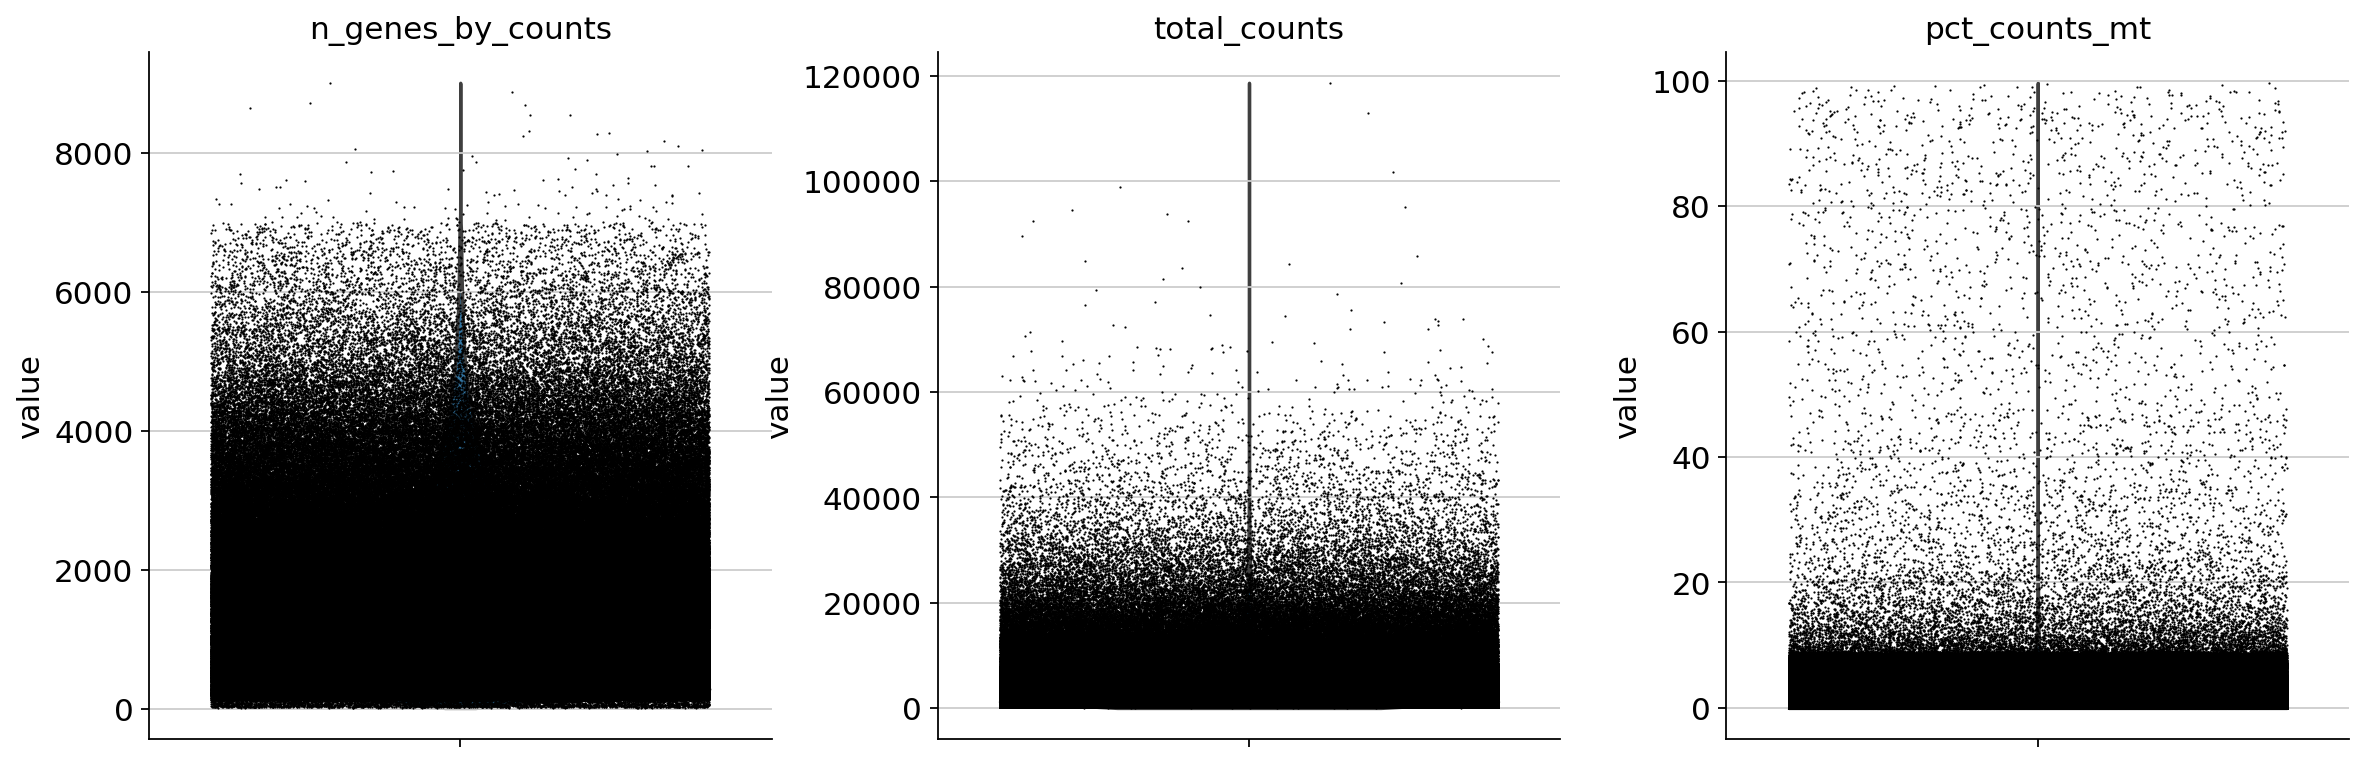

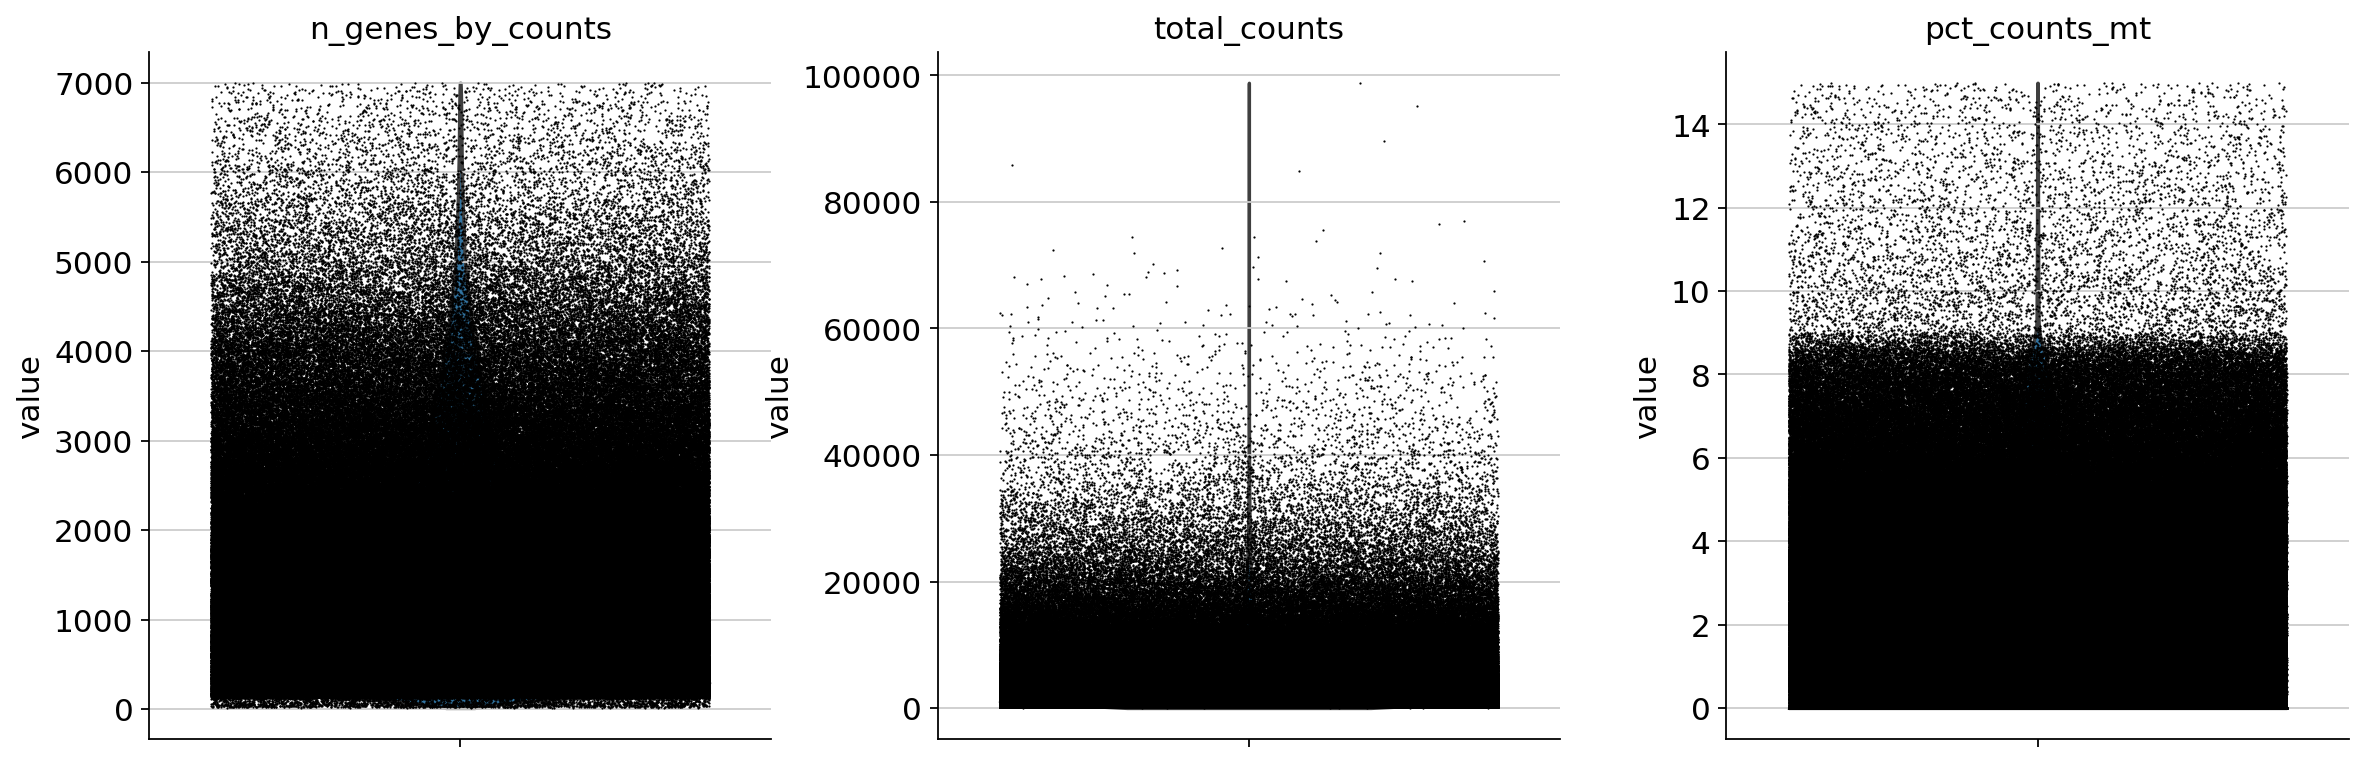

In [9]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True,save='Counts.png')

adata = adata[adata.obs.n_genes_by_counts < 7000, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]
adata = adata[adata.obs.total_counts < 100000, :]

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True,save='Post_Counts.png')


In [10]:
n_cells_pre = adata.shape[0]
sc.pp.filter_cells(adata, min_genes=200)
n_cells_post = adata.shape[0]
print("Number of cells removed: " + str(n_cells_pre - n_cells_post))
print("Number of cells pre-filtering: " + str(n_cells_pre))
print("Number of cells post filtering: " + str(n_cells_post))
adata.shape

filtered out 29932 cells that have less than 200 genes expressed
Number of cells removed: 29932
Number of cells pre-filtering: 809922
Number of cells post filtering: 779990


(779990, 71802)

In [ ]:
Then to check for the low genes

In [ ]:
n_genes_pre = adata.shape[1]
sc.pp.filter_genes(adata, min_cells=10)
n_genes_post = adata.shape[1]
print("Number of genes removed: " + str(n_genes_pre - n_genes_post))
print("Number of genes pre-filtering: " + str(n_genes_pre))
print("Number of genes post filtering: " + str(n_genes_post))

In [ ]:
Using this corrected adata, we send back each studies new gene names, cells and counts

In [12]:
sets = [covid,copd_covid,copd,age,cssc,murid,hyper,tb,cancer,hypo,rad,\
	sendai,tumor,fibro,asthma,fibage,influ]
i = 0

for study in np.unique(adata.obs['study']):
    print(study)
    study_subset = adata[adata.obs['study'] == study].copy()
    
    original_study = sets[i]
    for dataset in sets:
        if study in np.unique(dataset.obs['study']):
            original_study = dataset[dataset.obs['study'] == study].copy()
            break
    new_subset_genes = study_subset.var_names.intersection(original_study.var_names)
    new_subset_cells = study_subset.obs_names.intersection(original_study.obs_names)
    new_subset = original_study[new_subset_cells,new_subset_genes]
    print(new_subset.shape)
    new_subset.raw.X = new_subset.X
    new_subset.write("/data/kkovacs/Python/Data/"+study+".h5ad")
    
    variable_name = next(name for name, value in globals().items() if value is sets[i])
    globals()[f"{variable_name}_updated"] = new_subset
    i += 1

Mouse_Age
(12516, 20347)
Mouse_COPD_SHAM_SARSCov2
(58711, 25025)
Mouse_Cancer
(15775, 25296)
Mouse_Copd
(68687, 20855)
Mouse_Copd_Covid
(27473, 30867)
Mouse_Covid
(36692, 33260)
Mouse_Herpesvirus
(27400, 20732)
Mouse_Hyperoxia
(44701, 25991)
Mouse_Hypoxia
(10093, 35899)
Mouse_Post_Sendai
(15546, 24384)
Mouse_Radiation
(6238, 24384)
Mouse_TB
(40101, 24384)
Mouse_TumorKO
(15599, 27111)
Mouse_asthma
(70872, 27108)
Mouse_fibro_age
(220996, 32011)
Mouse_fibrosis
(17783, 21990)
Mouse_influenza
(45237, 31803)
